# Example 3: Using custom spectral density

It is also possible to calculate the spectra using a custom user-defined spectral density. This may be useful for instance for less conventional spectral lineshapes or spectral densities extracted from MD simulations.

To calculate spectra with a custom $J(\omega)$, we need to use the 'Dye' module.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from vibron import Dye
from vibron.utils import units

We can define some spectral density on numerical range. Here, we will use a combination of an ohmic background and a broadened single-mode SD.

Text(0, 0.5, 'J($\\omega$)')

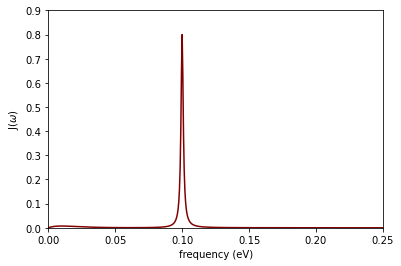

In [2]:
w = np.linspace(0,2,4000)
wc = 0.01
J = 0.02 * (w/wc) * np.exp(-w/wc)  + w * 0.8e-5 /((w-0.1)**2 + 1e-6)

plt.plot(w,J,color='maroon')
plt.xlim(0,0.25)
plt.ylim(0,0.9)
plt.xlabel('frequency (eV)')
plt.ylabel('J($\omega$)')

We then follow similar steps as in the previous examples:

In [3]:
molec = Dye()
molec.vert_energy = 2.66
molec.freq = w
molec.spec_dens = J

The reorganization energy for this spectral density can be calculated using:

In [4]:
molec.reorganization()

0.04502847334233216

To obtain the emission/absorption spectra we simply use:

In [5]:
energy, emis = molec.emission_spectrum()
energy, abso = molec.absorption_spectrum()

No dipole moment was given. Returning a normalized spectrum.
No dipole moment was given. Returning a normalized spectrum.


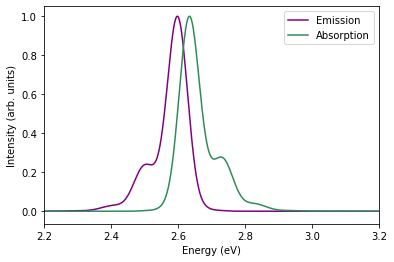

In [6]:
plt.plot(energy,emis,label='Emission',color='purple')
plt.plot(energy,abso,label='Absorption',color='seagreen')
plt.xlim([2.2,3.2])
plt.ylabel('Intensity (arb. units)')
plt.xlabel('Energy (eV)')
plt.legend()

As expected, we recover a broadened single-mode-type spectra.

We can similarly calculate the fluorescence lifetime:

In [10]:
molec.dipole = 10 # in Debye

lifetime = 1e9/molec.fluorescence_rate() # in ns
print (f"Lifetime = {lifetime:.2f} ns")

Lifetime = 3.58 ns
